<h1 align="center"><font size="7" face="arial" color="#D55123">DEMO</font></h1>

<h1 align="center"><font size="7" face="arial" color="#D55123">Explore model dynamics</font></h1>

<br><p><div style="text-align: justify"><font size="4.5" face="time roman">The TVB scripting interface has an interactive tool for <b>visualizing and exploring the phase-plane</b> of the dynamics of a model and at the same time, <b>setting its parameters</b>. This demonstration notebook shows an example of its use.</font></div></p>


<p><div style="text-align: justify"><font size="4.5" face="time roman">Note that this works best for the simpler, <b>2d</b>, models, as their trajectories and nullclines lie within a single plane and are thus easily visualized. And so, for the demo, here, we are primarly sticking with a model of that type. However, although it requires a little more effort, it can still be used to get a basic handle on the dynamics of higher dimensional models.</font></div></p>


<p><div style="text-align: justify"><font size="4.5" face="time roman">It is also important to note that this is only for the <b>local dynamic model</b>, that is, it only represents the dynamic behaviour of a <b>disconnected</b> node.</font></div></p><br>

<h1><font size="6" face="arial" color="#D55123">How to do it with TVB?</font></h1> 

---

<p><div style="text-align: justify"><font size="4.5" face="time roman">The first thing we need to do, is to import the necessary TVB modules and some additional Python packages to perform and analyze our model.</font></div></p>

In [1]:
# Online visualization.
%pylab nbagg

# Import tvb library.
from tvb.simulator.lab import *

# Import a bunch of stuff to ease command line usage.
import numpy as np
import time as tm

Populating the interactive namespace from numpy and matplotlib


<h1><font size="6" face="arial" color="black">1. Simple 2D Model</font></h1>

<h2><font size="5" face="arial" color="black">Create a Model instance</font></h2>

<p><div style="text-align: justify"><font size="4.5" face="time roman">We are starting by selecting the model we want to explore and set its parameters. To do so, we are creating a <b>Model</b> object and taking a quick look at its parameters.</font></div></p>

<p><div style="text-align: justify"><font size="4.5" face="time roman">Here, we are using the <b>generic 2-dimensional oscillatory model</b> describing one neural population with two states-variables <i>(V, W)</i>, and representing by the following set of equations:</font></div></p>

\begin{eqnarray}
    \dot{V} &=& d \tau (-fV^{3} + eV^{2} + gV + \alpha W + \gamma I)\\
    \dot{W} &=& \dfrac{d}{\tau}(cV^{2} + bV + - \beta W + a)
\end{eqnarray}

<br><p><div style="text-align: justify"><font size="4.5" face="time roman">The two state-variables are typically considered to represent a function of the neuron's membrane potential and a recovery variable, respectively. To find out more details on the model, see Sanz-Leon et al. (2015), p. 399.</font></div></p>

In [2]:
mod = models.Generic2dOscillator()
mod 

,value
"I [min, median, max]","[0, 0, 0]"
I dtype,float64
I shape,"(1,)"
Type,Generic2dOscillator
"a [min, median, max]","[-2, -2, -2]"
a dtype,float64
a shape,"(1,)"
"alpha [min, median, max]","[1, 1, 1]"
alpha dtype,float64
alpha shape,"(1,)"


<p><div style="text-align: justify"><font size="4.5" face="time roman">The default parameter values for this model are set to a so-called excitable regime with a characteristic frequency of approximately 10Hz.</font></div></p>

<h2><font size="5" face="arial" color="black">Create an Integrator scheme instance</font></h2>

<p><div style="text-align: justify"><font size="4.5" face="time roman">Now that we have defined our model, we need to select an integration scheme. We employ a standard <b>Heun method</b> with an integration time step of <b>1</b>.</font></div></p>

<p><div style="text-align: justify"><font size="4.5" face="time roman">Note: To make trajectories longer, increase the integration step. This will not influence the simulation.</font></div></p>

In [3]:
dt = 1      #integration steps [ms] 
heunint = integrators.HeunDeterministic(dt=dt) 

<h2><font size="5" face="arial" color="black">Create and launch the Phase Plane Interactive GUI.</font></h2>

<p><div style="text-align: justify"><font size="4.5" face="time roman"><b>Phase Plane Interactive</b> viewer is a tool for <b>visualizing and exploring the behaviour of a model</b> as a function of its parameters. It is a relatively simple plot, but it adds a number of useful features compared with standard Python functions.</font></div></p>

<IPython.core.display.Javascript object>


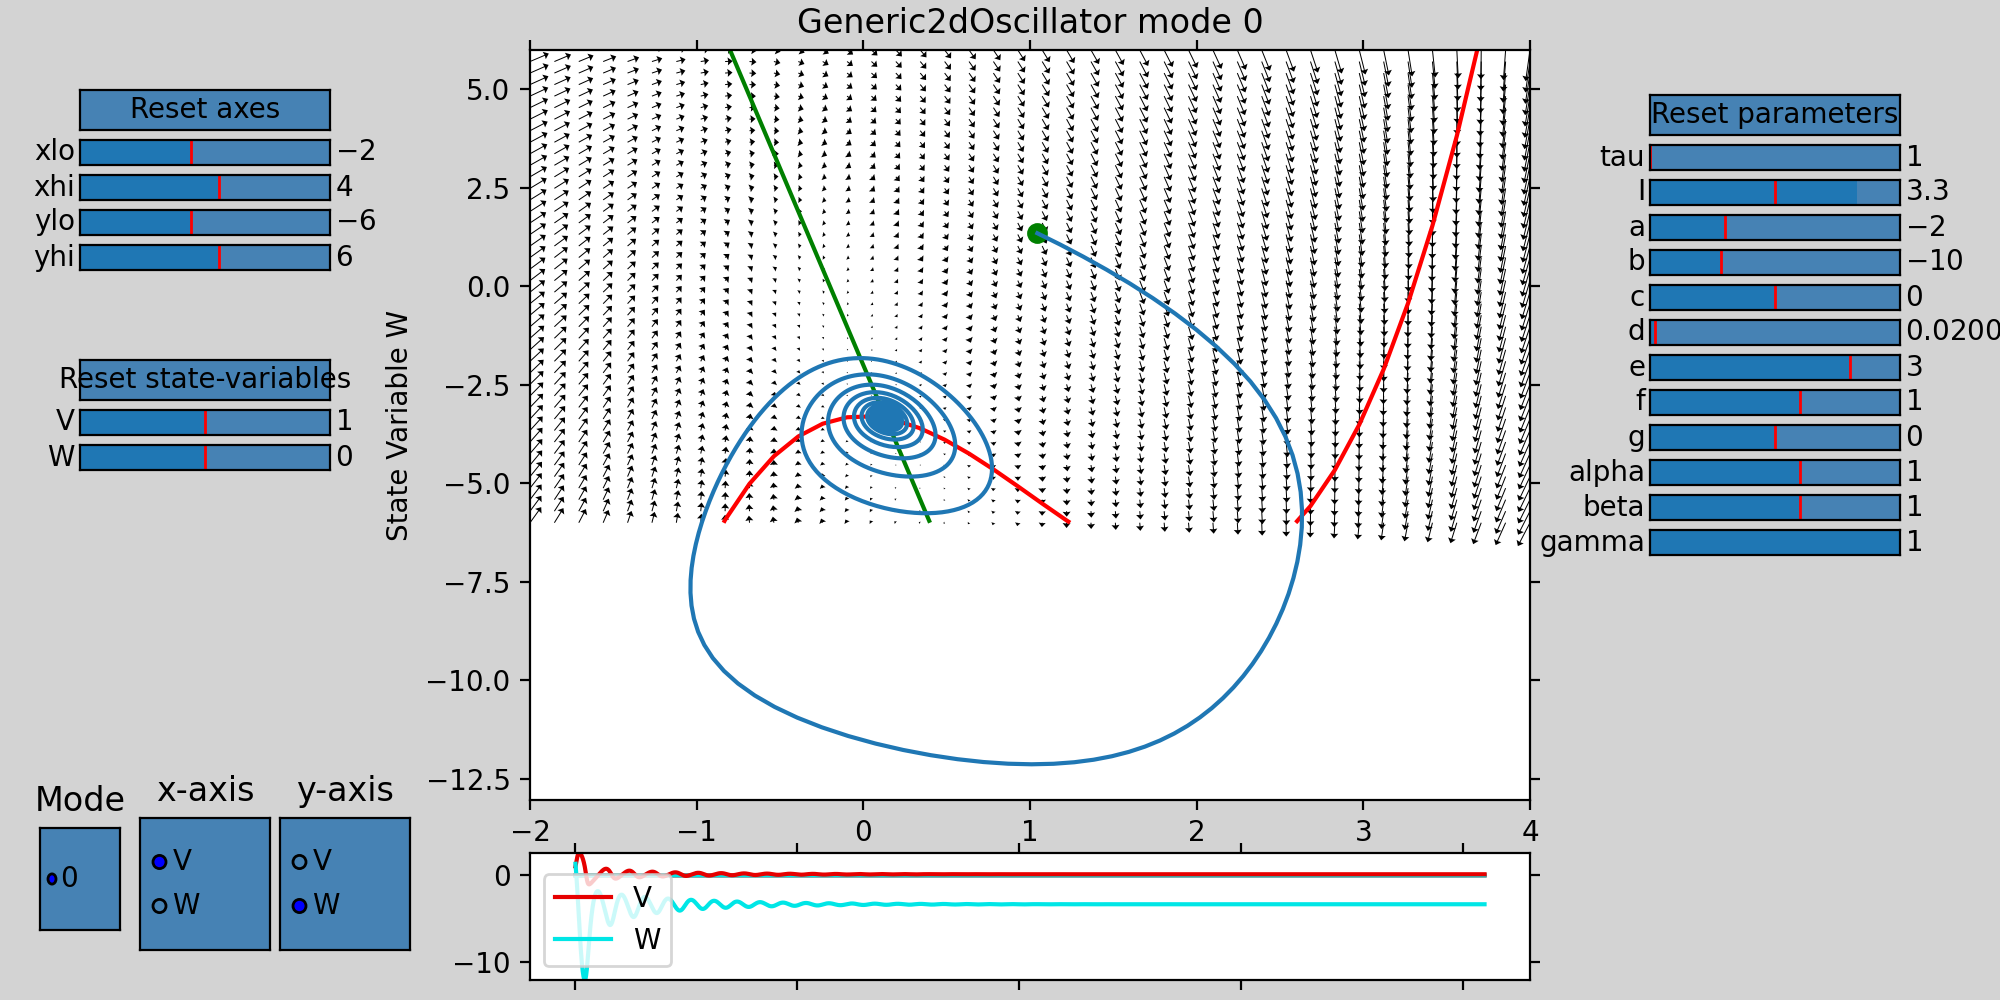

In [4]:
# Import viewer function.
from tvb.simulator.plot.phase_plane_interactive import PhasePlaneInteractive

#Configure the phase-plane and generate plot.
ppi_fig = PhasePlaneInteractive(model=mod, integrator=heunint)
ppi_fig.show()

<p><div style="text-align: justify"><font size="4.5" face="time roman">In the main central panel of the window, you can see the phase-plane for the model, including arrows representing the <b>vector field</b> and coloured lines representing any <b>nullclines</b> present in this plane.</font></div></p>

<p><div style="text-align: justify"><font size="4.5" face="time roman">Clicking on the phase-plane will launch a <b>sample trajectory</b> originating from where you clicked. Below the phase-plane is a panel which will show time series for both state variables for any sample trajectories you initiate. All around the edges are sliders for adjusting model parameters and adjusting what is displayed. The red vertical lines in sliders indicate the initial values.</font></div></p>

<p><div style="text-align: justify"><font size="4.5" face="time roman">For example, when working with a single isolated node (uncoupled network), <i>I</i> can be varied as a parameter that changes the baseline of the cubic nullcline (red curve). In the excitable configuration (i.e., default parameter values), for <b>low values of <i>I</i></b>, there is <b>only one stable fixed point</b>. For <b>higher value of <i>I</i></b>, the cubic <i>V</i>-nullcline (red curve) goes down, and a trajectory in the phase plane performs a large excursion before returning to a fixed point. If a certain <b>threshold is exceeded (<i>I > 3.7</i>)</b>, then the fixed point is destabilized, leading to a <b>stable limit cycle</b>.</font></div></p><br> 

<p><div style="text-align: justify"><font size="4.5" face="time roman">After we have adjusted parameters to our satisfaction, we can close the window and take another quick look at the parameters of our model.
</font></div></p>

In [5]:
mod

,value
"I [min, median, max]","[3.29375, 3.29375, 3.29375]"
I dtype,float64
I shape,"(1,)"
Type,Generic2dOscillator
"a [min, median, max]","[-2, -2, -2]"
a dtype,float64
a shape,"(1,)"
"alpha [min, median, max]","[1, 1, 1]"
alpha dtype,float64
alpha shape,"(1,)"


<p><div style="text-align: justify"><font size="4.5" face="time roman">As you can see in the lines above, the model's parameters, for example <i>I</i>, is modified from its initial value.</font></div></p>

<h1><font size="6" face="arial" color="black">2. Complex Model</font></h1>

<p><div style="text-align: justify"><font size="4.5" face="time roman">In the case of higher-dimensional models, phase spaces are easier to use when analyzing the behavior of dynamical systems restricted to motion around and along various axes of rotation or translation.</font></div></p>

<h2><font size="5" face="arial" color="black">Create a Model instance</font></h2>

<p><div style="text-align: justify"><font size="4.5" face="time roman">Here, we are using the <b>Epileptor</b> model describing two populations, with four state-variables <i>(x<sub>1</sub>, y<sub>1</sub>)</i> and <i>(x<sub>2</sub>, y<sub>2</sub>)</i>, and one slow-permittivity variable <i>z</i>, and representing by the following set of equations:</font></div></p>

\begin{eqnarray}
    \dot{x}_{1} &=& y_{1} - f_{1}(x_{1}, x_{2}) - z + I_{ext_{1}}\\
    \dot{y}_{1} &=& 1 - 5x_{1}^{2} - y_{1}\\
    \dot{z} &=& \dfrac{1}{\tau_{0}} \ (4 (x_{1} - x_{0}) - z)\\
    \dot{x}_{2} &=& - y_{2} + x_{2} - x_{2}^{3} + I_{ext_{2}} + 0.002g(x_{1}) - 0.3 (z - 3.5)\\
    \dot{y}_{2} &=& \dfrac{1}{\tau_{2}} \ (-y_{2} + f_{2}(x_{2}))\\
\end{eqnarray}

<br><p><div style="text-align: justify"><font size="4.5" face="time roman">To find out more details on the model, see El Houssaini et al. (2020).</font></div></p>

In [7]:
mod2 = models.Epileptor()
mod2

,value
"Iext [min, median, max]","[3.1, 3.1, 3.1]"
Iext dtype,float64
Iext shape,"(1,)"
"Iext2 [min, median, max]","[0.45, 0.45, 0.45]"
Iext2 dtype,float64
Iext2 shape,"(1,)"
"Kf [min, median, max]","[0, 0, 0]"
Kf dtype,float64
Kf shape,"(1,)"
"Ks [min, median, max]","[0, 0, 0]"


<h2><font size="5" face="arial" color="black">Create an Integrator scheme instance</font></h2>

In [8]:
dt2 = 0.1      #integration steps [ms]
heunint2 = integrators.HeunDeterministic(dt=dt2) 

<h2><font size="5" face="arial" color="black">Create and launch the Phase Plane Interactive GUI.</font></h2>

<p><div style="text-align: justify"><font size="4.5" face="time roman">The selected model, Epileptor,  has a <b>6-dimensional phase space</b>. The central panel shows a 2-dimensional axis cut of this space.</font></div></p>

<IPython.core.display.Javascript object>


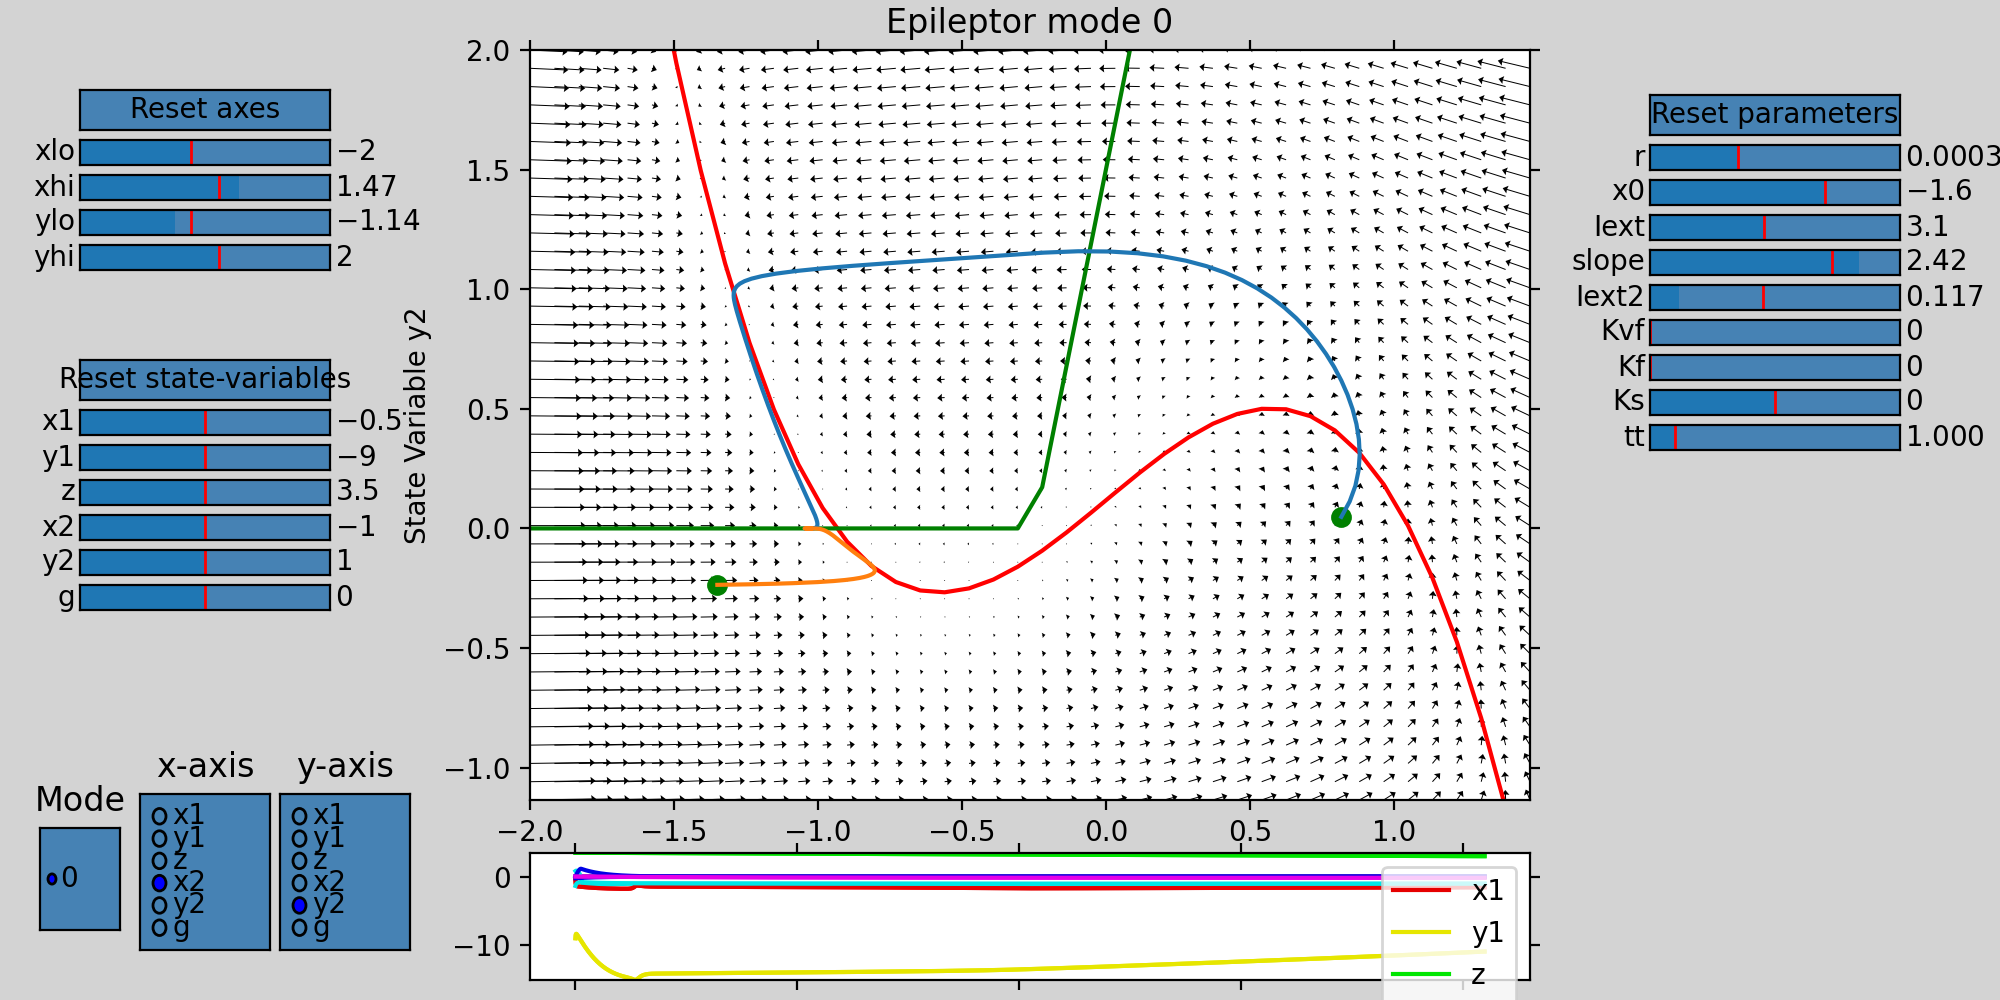

In [9]:
ppi_fig2 = PhasePlaneInteractive(model=mod2, integrator=heunint2)
ppi_fig2.show()

<p><div style="text-align: justify"><font size="4.5" face="time roman">Looking at the phase space: 
<br>
<ul>
<li>We have, here, the <b>first population (variables $\pmb{x_{1}}$ in abscissa and $\pmb{y_{1}}$ in ordinate)</b>, responsible for the <b>low-voltage fast discharges</b> in the Epileptor model.

For example, when working with a single isolated node (uncoupled network), <i>m</i> (here, denoted by <i>slope</i>) can be varied as a parameter that changes the baseline of the <i>x<sub>1</sub></i>-nullcline (red curve). In the default parameter configuration, for <b>low values of <i>m</i></b>, <b>three equilibrium points</b> coexist: the left most intersection of the two nullclines defines a <b>stable fixed point</b>, whereas the right most intersection is the center of a <b>stable focus</b>. Both states are separated by a <b>separatrix (saddle node)</b>, as you can see by drawing different trajectories in this phase space.

For <b>higher value of <i>m</i></b>, the stable focus becomes unstable and is surrounded by a <b>stable limit cycle</b>. The limit cycle radius increases as <i>m</i> is increased.</li><br>

<li>We can also have a look at other state-variables in the phase space, such as the <b>second population (variables $\pmb{x_{2}}$ in abscissa and $\pmb{y_{2}}$ in ordinate)</b>, responsible for the <b>interictal spikes</b> and <b>spike-and-wave discharges</b> in the Epileptor model. Change the lower and upper bound of the axis to see correctly the phase space.
    
For example, when working with a single isolated node (uncoupled network), <i>I<sub>ext2</sub></i> can be varied as a parameter that changes the baseline of the <i>x<sub>2</sub></i>-nullcline (red curve). In the default parameter configuration, for <b>low values of <i>I<sub>ext2</sub></i></b>, the <b>single intersection</b> of the two nullclines defines an <b>unstable focus</b>, to which trajectories converge to a <b>stable limit cycle</b>. 
    
For <b>lower value of <i>I<sub>ext2</sub></i></b>, <b>three equilibrium points</b> can coexist: the left most intersection of the two nullclines defines a <b>stable fixed point</b>, whereas the right most intersection is the center of a <b>unstable focus</b>, and the middle intersection defines a <b>saddle node</b>. Trajectories converge to the stable node.
    

For <b>very small value of <i>I<sub>ext2</sub></i></b>, there is only one <b>stable fixed point</b>, to which trajectories converge.</li>

<br><li>We can continue to play along to explore the dynamics of this model.</li>
</ul></font></div></p>

<h1><font size="6" face="arial" color="black">3. Stochastic Model</font></h1>

<p><div style="text-align: justify"><font size="4.5" face="time roman">As you have seen above, it is possible to explicitly specify the integration scheme used to plot sample trajectories. This can be particularly useful when deciding what amplitude to give your <b>noise</b> when specifying a <b>stochastic integration scheme</b>.</font></div></p>

<p><div style="text-align: justify"><font size="4.5" face="time roman">We will take a look at this using <b>HeunStochastic</b>, we will also pass in the same Model object we have modified in paragraph 1. In this way, PhasePlaneInteractive initialises with the parameters we would set for the Model, so that here we can focus on the effect of the noise amplitude relative to the intrinsic dynamics.</font></div></p>

<p><div style="text-align: justify"><font size="4.5" face="time roman">Starting by setting the noise to 0.0, to get a deterministic trajectory, and then adding a small amount of noise can help give a useful intuition for the effects of noise on a simulation.</font></div></p>

<h2><font size="5" face="arial" color="black">Create a Stochastic Integrator scheme instance</font></h2>

In [6]:
dt = 1                               #integration steps [ms]  

nsigma = np.array([0.01,])           #standard deviation of the noise 
hiss = noise.Additive(nsig=nsigma)   #definition of the noise with standard deviation nsig

heunstoint = integrators.HeunStochastic(dt=dt, noise=hiss)  

<h2><font size="5" face="arial" color="black">Create and launch the Phase Plane Interactive GUI</font></h2>

<IPython.core.display.Javascript object>


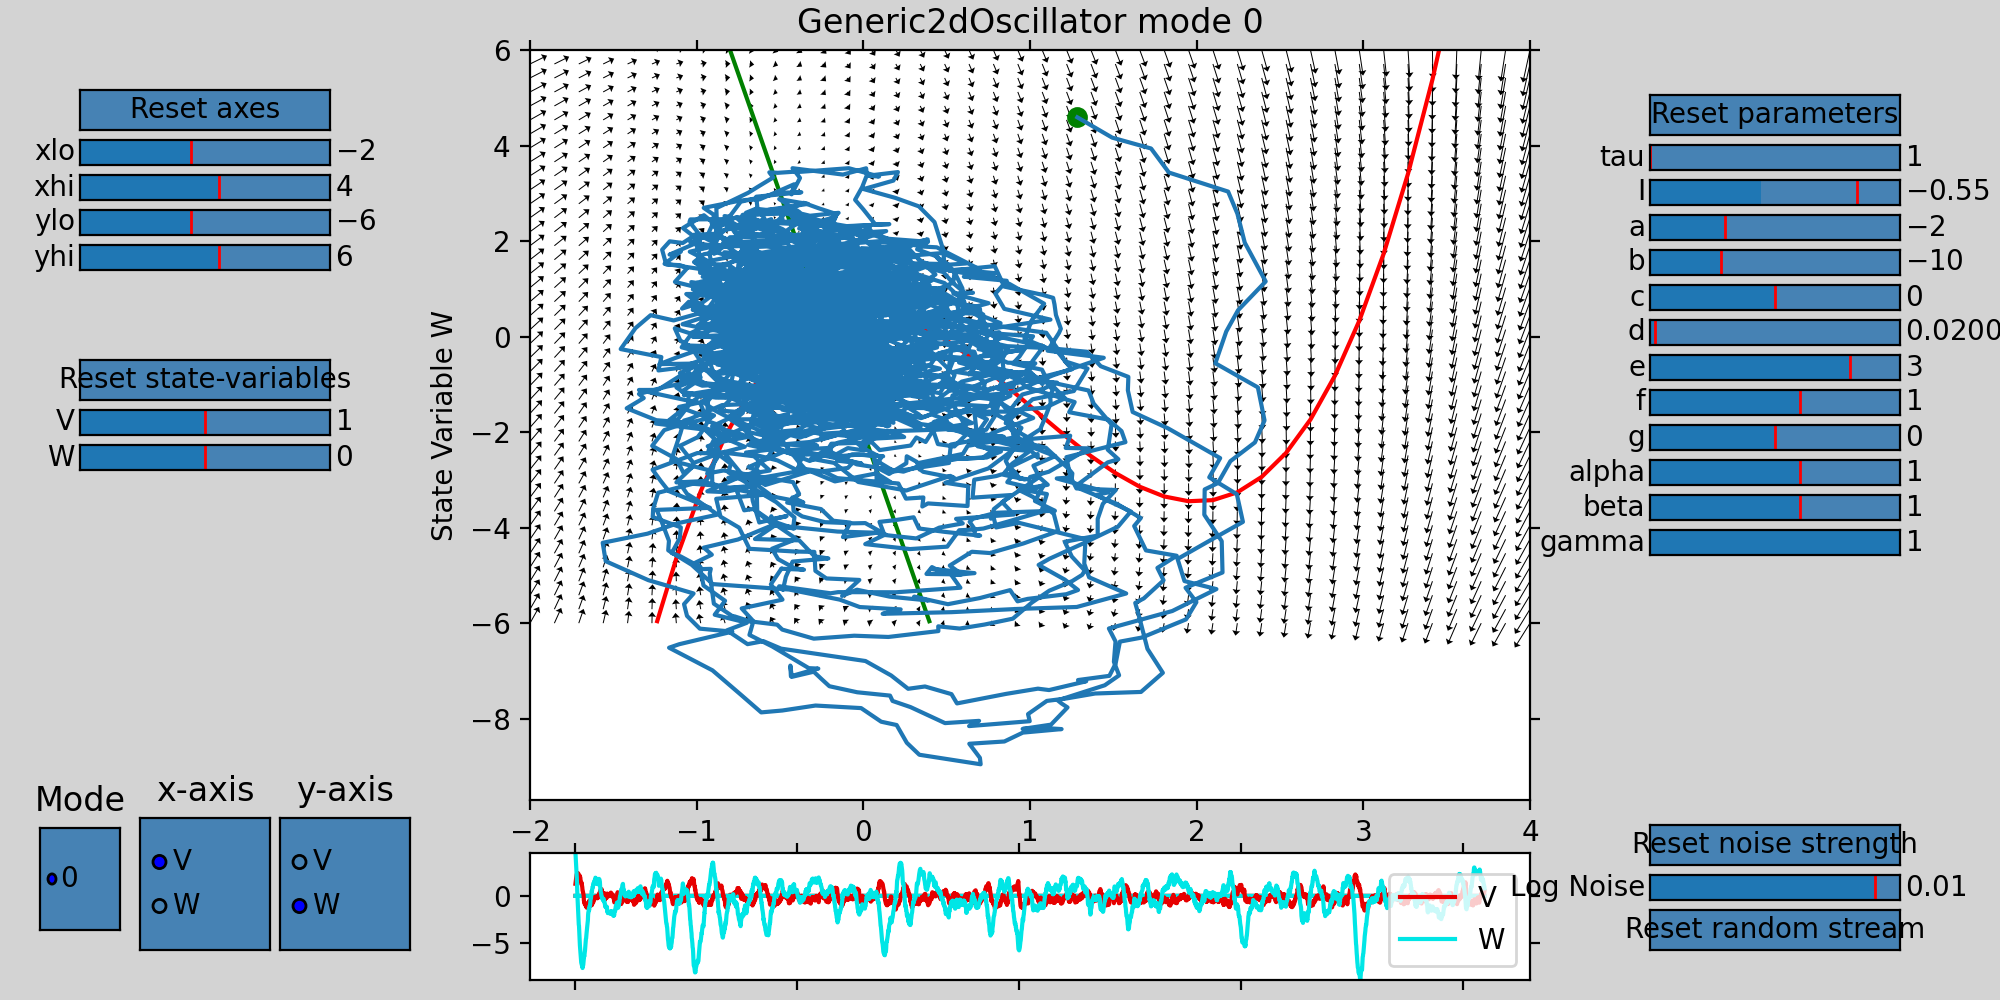

In [7]:
ppi_fig3 = PhasePlaneInteractive(model=mod, integrator=heunstoint)
ppi_fig3.show()

- phase space exploration: alternance fixed point + oscillations

<h1><font size="6" face="arial" color="black">4. How to deal with One-dimensional Model?</font></h1>



<h2><font size="5" face="arial" color="black">Create a Model instance</font></h2>

<p><div style="text-align: justify"><font size="4.5" face="time roman">Here, we are using the <b>Reduced Wong-Wang</b> model describing one populations with one state-variable <i>S</i> and representing by the following set of equations:</font></div></p>

In [37]:
rww = models.ReducedWongWang()
rww

,value
"I_o [min, median, max]","[0.33, 0.33, 0.33]"
I_o dtype,float64
I_o shape,"(1,)"
"J_N [min, median, max]","[0.2609, 0.2609, 0.2609]"
J_N dtype,float64
J_N shape,"(1,)"
Type,ReducedWongWang
"a [min, median, max]","[0.27, 0.27, 0.27]"
a dtype,float64
a shape,"(1,)"


In [38]:
# Initialize the state-variable S
S = np.linspace(0., 1., num=1000).reshape((1, -1, 1))   

# Remember: the phase-flow only represents the dynamic behaviour of a disconnected node => SC = 0.
C = S*0. 

<h3><font size="4" face="arial" color="black">Effects of the local excitatory recurrence $\pmb{w}$</font></h3>

In [39]:
# Parameter sweep
W = np.linspace(0.6, 1.05, num=50)

<IPython.core.display.Javascript object>


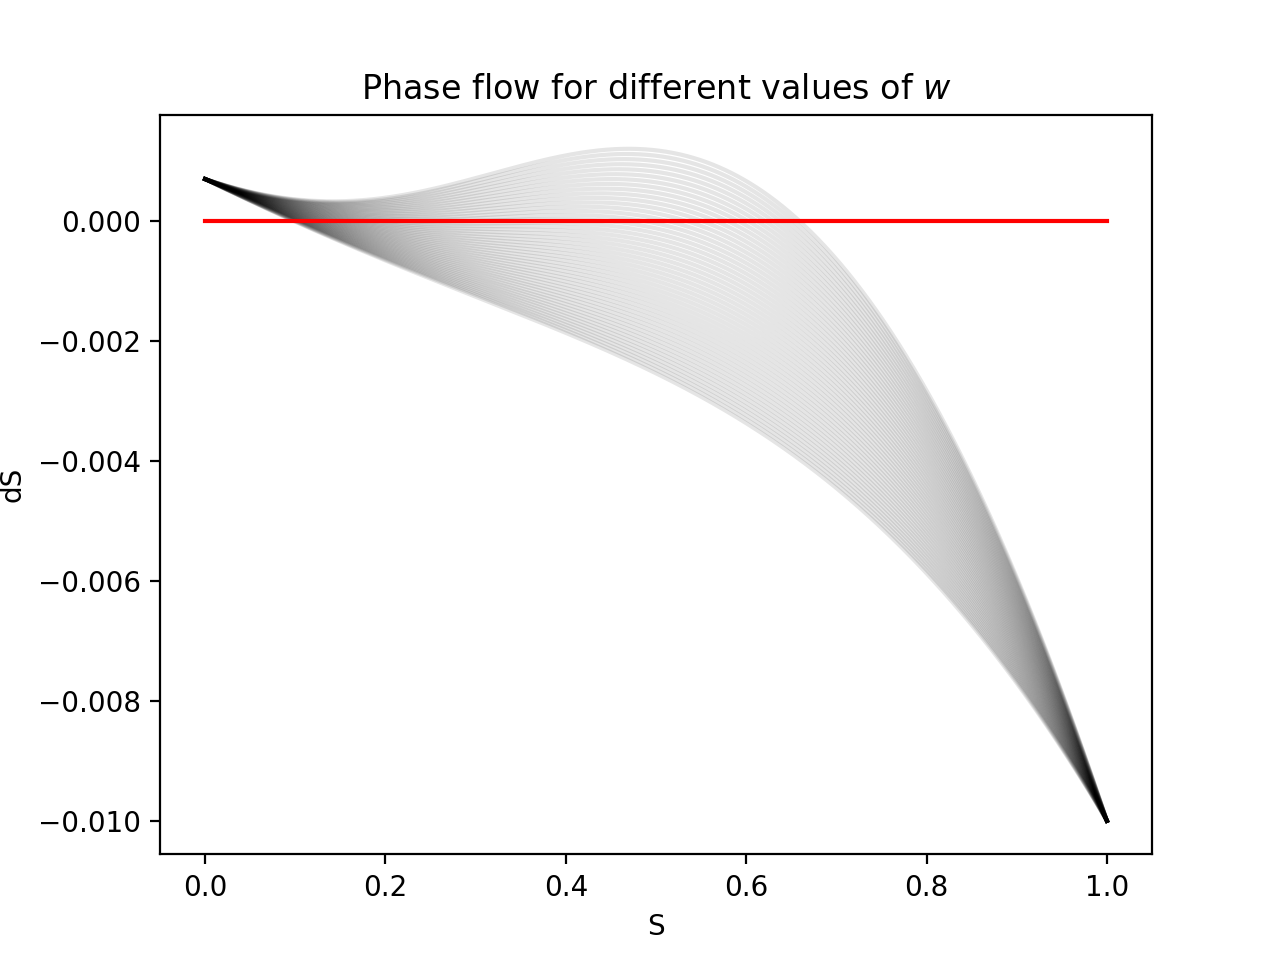

In [40]:
## Visualize phase-flow for different w values
fig = figure()
for iw, w in enumerate(W):
    rww.w = np.array([w,])
    dS = rww.dfun(S, C)  
    plot(S.flat, dS.flat, 'k', alpha=0.1)
plot([0, 0] , 'r')    
title('Phase flow for different values of $w$', fontsize=12)
xlabel('S', fontsize=10); xticks(fontsize=10)
ylabel('dS', fontsize=10); yticks(fontsize=10)
show()

<h3><font size="4" face="arial" color="black"> Effects of the external input $I_o$ </font></h3>

In [41]:
# Parameter sweep
Io = np.linspace(0.00, 0.42, num=50)
# Fixed w value at 1
#rww.w = np.array([1,])

<IPython.core.display.Javascript object>


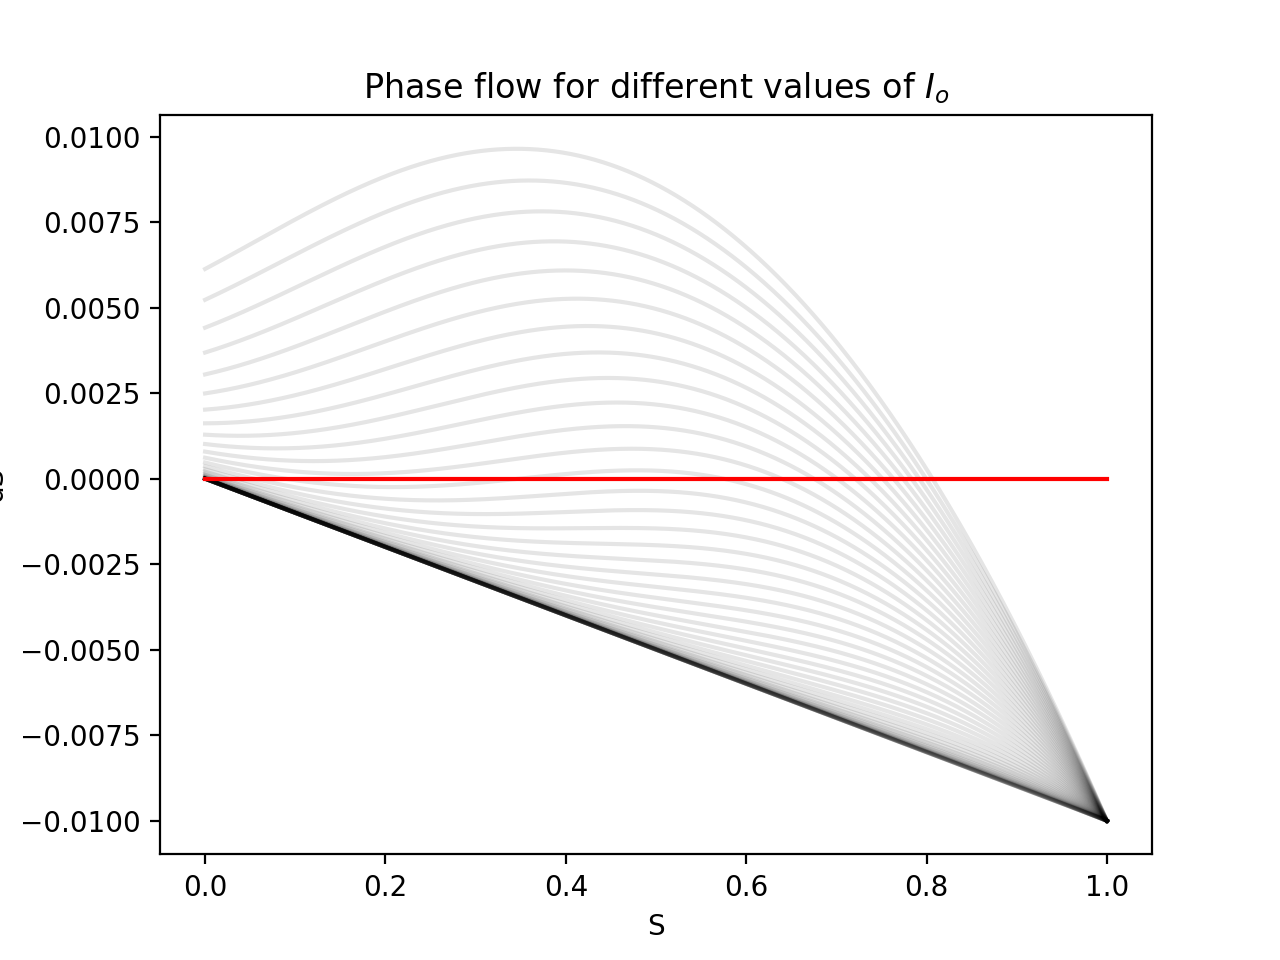

In [42]:
# Plot phase-flow for different Io values
fig = figure()
for i, io in enumerate(Io):
    rww.I_o = np.array([io,])
    dS = rww.dfun(S, C)
    plot(S.flat, dS.flat, 'k', alpha=0.1)
plot([0, 0] , 'r')    
title('Phase flow for different values of $I_o$', fontsize=12)
xlabel('S', fontsize=10); xticks(fontsize=10)
ylabel('dS', fontsize=10); yticks(fontsize=10)
show()

<h1><font size="6" face="arial" color="##000000">That is all folks</font></h1>

***

<p><div style="text-align: justify"><font size="4.5" face="time roman">I hope this has been a useful tutorial and welcome any comments or questions.</font></div></p>